In [2]:
import pandas as pd # importing necessary libaries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import matplotlib.patches as mpatches 
sns.set(color_codes=True)
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('always', category=UserWarning)

## Question 1: Density Plot

## Get the data

In [3]:
# read data from csv
data = pd.read_csv('fire_nrt_V1_96617.csv')
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [4]:
data.shape
# getting total number of rows and column in the dataframe
shape = data.shape
print(f" Shape of the dataframe = {data.shape}")
print(f" Total number of rows in the dataset =  {shape[0]}")
print(f" Total number of columns in the dataset =  {shape[1]}")

 Shape of the dataframe = (956257, 14)
 Total number of rows in the dataset =  956257
 Total number of columns in the dataset =  14


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    956257 non-null  float64
 1   longitude   956257 non-null  float64
 2   bright_ti4  956257 non-null  float64
 3   scan        956257 non-null  float64
 4   track       956257 non-null  float64
 5   acq_date    956257 non-null  object 
 6   acq_time    956257 non-null  int64  
 7   satellite   956257 non-null  object 
 8   instrument  956257 non-null  object 
 9   confidence  956257 non-null  object 
 10  version     956257 non-null  object 
 11  bright_ti5  956257 non-null  float64
 12  frp         956257 non-null  float64
 13  daynight    956257 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


In [6]:
data["bright_ti4"].value_counts()

367.0    136180
355.9      2035
305.9      1955
356.1      1925
306.5      1909
          ...  
257.6         1
289.6         1
290.2         1
290.1         1
269.6         1
Name: bright_ti4, Length: 822, dtype: int64

In [7]:
data["bright_ti5"].value_counts()

291.4    4468
291.0    4424
290.8    4413
291.2    4413
291.8    4410
         ... 
230.4       1
230.6       1
227.5       1
242.3       1
241.4       1
Name: bright_ti5, Length: 1428, dtype: int64

In [8]:
data.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp
count,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000
mean,-27.465569,142.191838,333.922148,0.460398,0.480464,986.334617,299.311259,15.557809
std,8.008223,10.986038,21.988456,0.089811,0.118792,555.548115,14.724600,45.584396
min,-43.212320,113.447010,208.000000,0.320000,0.360000,224.000000,150.000000,0.000000
25%,-33.133860,132.291060,312.800000,0.390000,0.380000,418.000000,289.500000,2.100000
50%,-30.489390,147.987880,336.700000,0.430000,0.440000,1400.000000,295.600000,5.200000
75%,-19.142220,150.751010,351.000000,0.510000,0.570000,1512.000000,307.600000,13.200000
max,-9.396500,153.452180,367.000000,0.800000,0.780000,1824.000000,380.000000,10717.200000


In [9]:
import numpy as np
np.random.seed(42)

<AxesSubplot:>

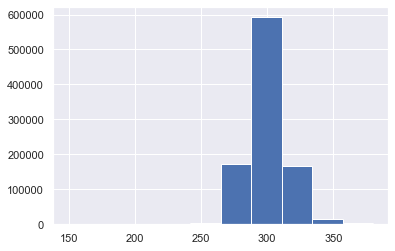

In [10]:
data["bright_ti5"].hist()

<Figure size 432x288 with 0 Axes>

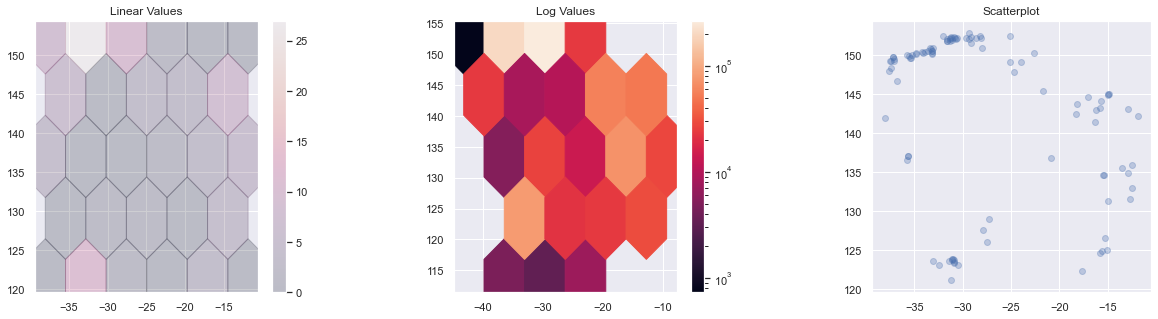

<Figure size 432x288 with 0 Axes>

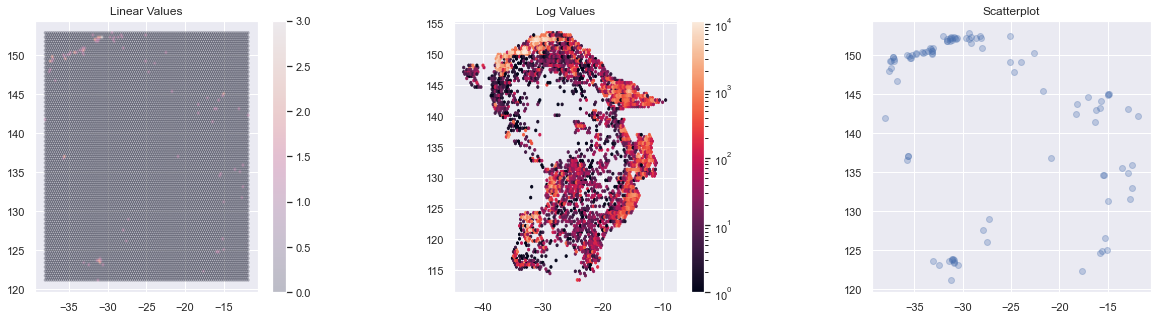

In [11]:
df_sample=data.sample(100)
def hexx(siz =1):
    plt.suptitle('Longitude vs Latitude several ways within a single figure'.format(x))
    fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
    fig.subplots_adjust(hspace=0.5, wspace = 0.5)
    ax = axes[0]
    hb = ax.hexbin(df_sample["latitude"], df_sample["longitude"], alpha=0.2, gridsize=x)
    ax.set_title("Linear Values")
    cb = fig.colorbar(hb, ax=ax)

    ax = axes[1]
    hb = ax.hexbin(data["latitude"], data["longitude"], gridsize=x, bins='log')
    ax.set_title("Log Values")
    
    cb = fig.colorbar(hb, ax=ax)
    ax = axes[2]
    sc = ax.scatter(df_sample["latitude"], df_sample["longitude"], alpha=0.3)
    ax.set_title("Scatterplot")
    plt.show()
for x in [5, 100]:
    hexx(x)

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\3934565085.py:1: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.



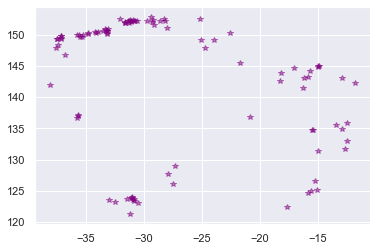

In [12]:
plt.plot( "latitude", "longitude", "", data=df_sample, linestyle='', marker='*', markersize=6, alpha=0.5, color="purple")

## Anomalies - Most of the anomalies are present in the lower region, around y axis of 125 in the above figure

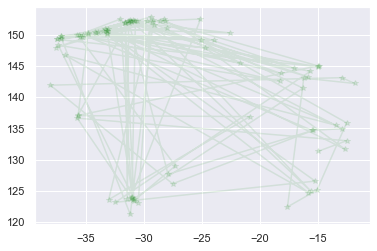

In [13]:
plt.plot(
    "latitude", "longitude", "", data=df_sample, marker='*', markersize=6, alpha=0.1, color="green")

# Few approaches to remove over plotting

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\2889765697.py:7: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.



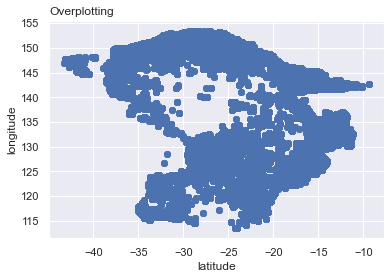

In [14]:
df=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('A',956257) })
tmp1=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('B',956257) })
tmp2=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('C',956257) })
df=df.append(tmp1).append(tmp2)
 
# plot
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Overplotting', loc='left')
plt.show()

# One can use the markers and markersize to get proper visial and location of every data point 

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\3701733185.py:1: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.



Text(0.0, 1.0, 'reduce dot size')

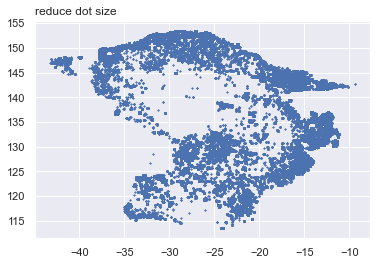

In [15]:
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)
plt.title('reduce dot size', loc='left')

# Using markers and proper colours can make the visualizations more appealing 

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\3212605776.py:1: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.



Text(0.0, 1.0, ' use transparency')

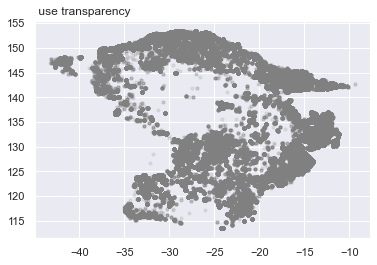

In [16]:
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=3, alpha=0.05, color="grey")
plt.title(' use transparency', loc='left')

# We can also plot the data group wise to get the clear picture of the distinct groups

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\3035962805.py:10: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\3035962805.py:13: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.

D:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

D:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

D:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

D:\Softwares\Anaconda\lib\site-packages\IPython\c

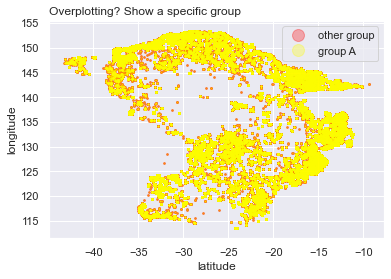

In [17]:
# Dataset:
df=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('A',956257) })
tmp1=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('B',956257) })
tmp2=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('C',956257) })
df=df.append(tmp1).append(tmp2)

# Filter the data randomly
df_filtered = df[ df['group'] == 'A']
# Plot the whole dataset
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=1.5, color="red", alpha=0.3, label='other group')
 
# Add the group to study
plt.plot( 'x', 'y', "", data=df_filtered, linestyle='', marker='o', markersize=1.5, alpha=0.3, color="yellow", label='group A')
 
# Add titles and legend
plt.legend(markerscale=8)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Overplotting? Show a specific group', loc='left')
plt.show()

# The data is properly sampled for 1000 values from the data set

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\558242498.py:2: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.



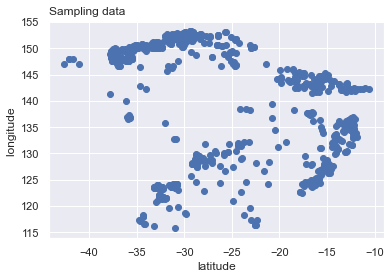

In [18]:
df_sample=df.sample(1000)
plt.plot( 'x', 'y', "", data=df_sample, linestyle='', marker='o')
plt.xlabel('latitude')
plt.ylabel('longitude ')
plt.title('Sampling data', loc='left')
plt.show()

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\293579099.py:4: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.

C:\Users\SANJU\AppData\Local\Temp\ipykernel_20520\293579099.py:7: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.

D:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

D:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

D:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

D:\Softwares\Anaconda\lib\site-packages\IPython\core\

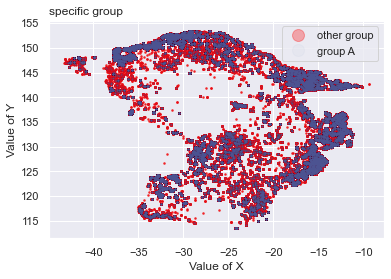

In [19]:
# Filter the data randomly
df_filtered = df[ df['group'] == 'A']
# Plot the whole dataset
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=1.5, color="red", alpha=0.3, label='other group')
 
# Add the group to study
plt.plot( 'x', 'y', "", data=df_filtered, linestyle='', marker='o', markersize=1.5, alpha=0.03, label='group A')
 
# Add titles and legend
plt.legend(markerscale=8)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('specific group', loc='left')
plt.show()

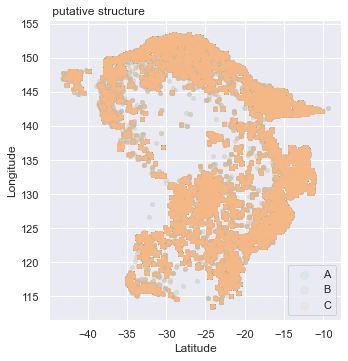

In [20]:
sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='group', legend=False, palette="Accent", scatter_kws={"alpha":0.1,"s":15} )
 
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(' putative structure', loc='left')
plt.show()

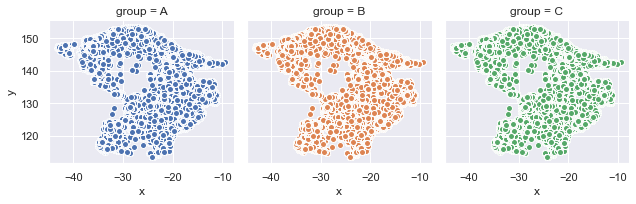

In [21]:
g = sns.FacetGrid(df, col="group", hue="group")
g = (g.map(plt.scatter, "x", "y", edgecolor="w"))

# various other ways of plotting the data to remove overplotting is commented below

In [22]:
#from scipy.stats import kde
#from mpl_toolkits.mplot3d import Axes3D
#nbins=300
#k = kde.gaussian_kde([df.x,df.y])
#xi, yi = np.mgrid[ df.x.min():df.x.max():nbins*1j, df.y.min():df.y.max():nbins*1j]
#zi = k(np.vstack([xi.flatten(), yi.flatten()]))
#data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
#ax.view_init(30, 80)

In [23]:
#df=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('A',956257) })
#tmp1=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('B',956257) })
#tmp2=pd.DataFrame({'x': data['latitude'], 'y': data['longitude'], 'group': np.repeat('C',956257) })
#df=df.append(tmp1).append(tmp2)

#sns.stripplot(data =df, x="x", y="y", jitter=0.2, size=2)
#plt.title('jitter  for non-continuous data', loc='left')

In [24]:
#sns.kdeplot(data = df, x="x", y="y", cmap="Reds", shade=True)
#plt.title(' 2D density graph', loc='left')

In [25]:
#sns.jointplot(x=df.x, y=df.y, cmap="Blues", shade=True, kind='kde')
#plt.show()

In [26]:
#plt.boxplot( data["latitude"], data["longitude"])

#plt.boxplot(data["latitude"] )#,patch_artist=True,labels=['subject1','subject2','subject3','subject4'])
#plt.show()

In [27]:
#fig, ax = plt.subplots(2, 3)
#fig.set_figheight(5)
#fig.set_figwidth(15)
#sns.boxplot(x=data["latitude"] ,ax=ax[0][0]);
#sns.boxplot(x=data["longitude"] ,ax=ax[0][1]);
#sns.boxplot(x=data["latitude"],ax=ax[0][2]);
#sns.lineplot(x=data["longitude"] ,ax=ax[1][0]);
#sns.lineplot(x=data["latitude"],ax=ax[1][1]);
#sns.boxplot(x=data["longitude"],ax=ax[1][2]);
#fig.tight_layout() 
#plt.show()

In [28]:
#box_plot_data=[data['latitude'], data["longitude"]]
#plt.boxplot(box_plot_data,patch_artist=True,labels=['latitude','latitude'])
#plt.show()

## Question 2: Visualizing class membership

<AxesSubplot:>

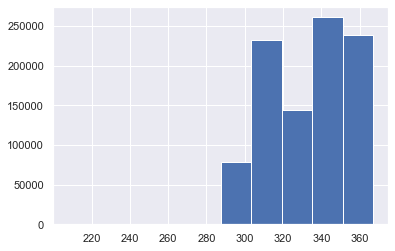

In [29]:
data["bright_ti4"].hist()

# From the above figure we can see that there are many I4 brightness points on the saturation side,which is > 300 and too less points for unsaturated

<AxesSubplot:>

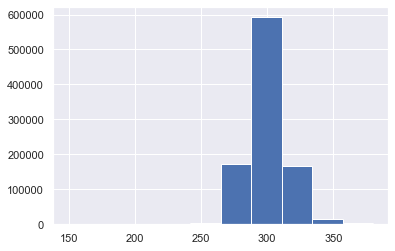

In [30]:
data["bright_ti5"].hist()

# From the above figure we can see that there are many I5 brightness points on the saturation side,which is < 300

In [31]:
saturated = data[data['bright_ti4']>300]
unsaturated = data[data['bright_ti4']<300]
s = [saturated, unsaturated]
count = 0

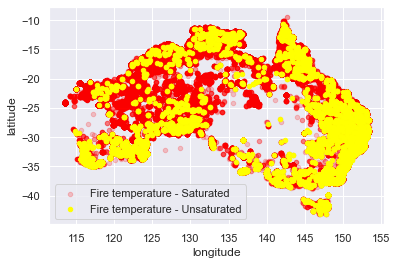

In [34]:
ax = s[0].plot(kind="scatter",
                            x='longitude',
                            y='latitude',
                            label="Fire temperature - Saturated",
                            alpha=0.2,
                            color='red'
                            )

s[1].plot(kind="scatter",
                            x='longitude',
                            y='latitude',
                            label="Fire temperature - Unsaturated",
                            color='yellow',
                            ax=ax)      
plt.show()

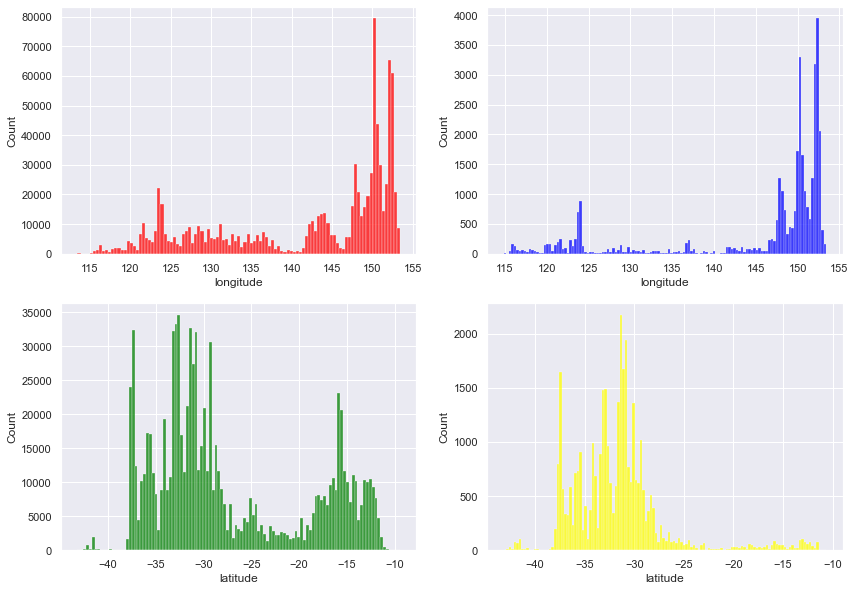

In [35]:
f, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(saturated['longitude'], color="red", ax=axes[0, 0])
sns.histplot(unsaturated['longitude'], color="blue", ax=axes[0, 1])
sns.histplot(saturated['latitude'], color="green", ax=axes[1, 0])
sns.histplot(unsaturated['latitude'], color="yellow", ax=axes[1,1])
plt.show()

# From these histogram/frequency plots it can be derived that 
# 1.(fig (0,0)) saturated longitude values lie more ~8000 in number in the end, at around 150
# 2.(fig (0,1)) unsaturated longitude values lie more ~8000 in number in the end, at around 155
# 3.(fig (1,0)) saturated latitude values lie more ~35000 in number in the start of middle, at around -37
# 4.(fig (1,1)) unsaturated latitude values lie more ~2250 in number in the start of middle, at around -37

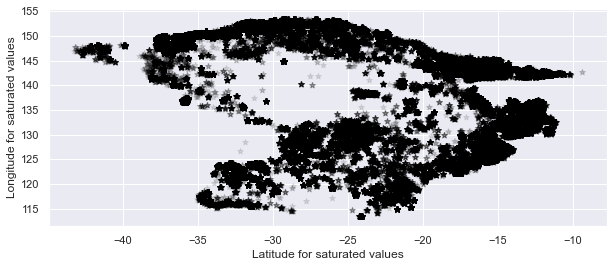

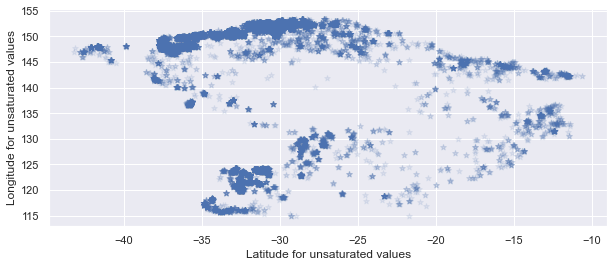

In [36]:

plt.figure(figsize=(10, 4))
plt.scatter(saturated['latitude'],saturated['longitude'],marker = "*", color="black", alpha=0.1)
plt.xlabel('Latitude for saturated values')
plt.ylabel('Longitude for saturated values')
plt.show()
#print(saturated['latitude'])
plt.figure(figsize=(10, 4))
plt.scatter(unsaturated['latitude'],unsaturated['longitude'],marker = "*", alpha=0.1)
plt.xlabel('Latitude for unsaturated values')
plt.ylabel('Longitude for unsaturated values')
plt.show()

# The difference in distribution is that out of the entire data we get points in I4 brightness greater than 300 which is saturated in one plot (above in the figure), and the points in I4 brightness lesser than 300 which is unsaturated in another plot(below in the figure). The summation of these 2 plots is the original total data that we are given. whihc is plotted in the previous to previous plots(question 1)

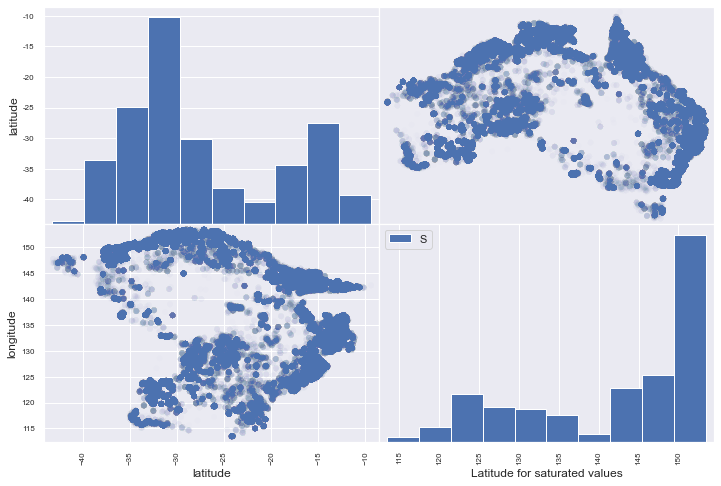

In [37]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["latitude", "longitude"]
scatter_matrix(saturated[attributes], figsize=(12, 8), label = "Fire Temperature", alpha = 0.01, marker ='o')
plt.xlabel('Latitude for saturated values')
plt.ylabel('Longitude for saturated values')
plt.legend("SaturatedValues")


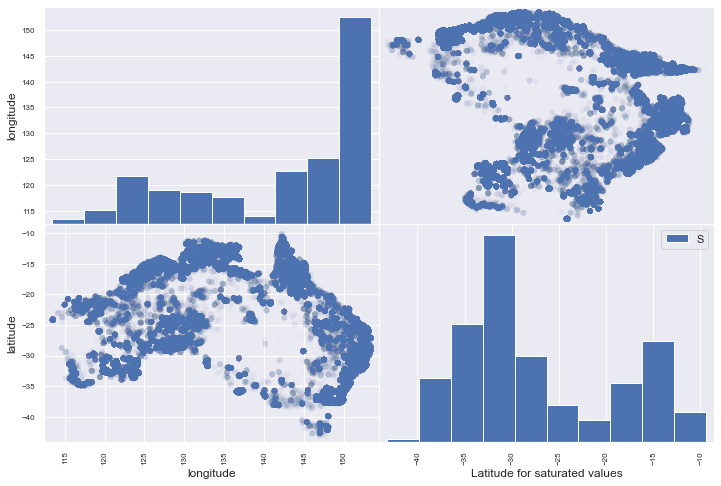

In [38]:
attributes = ["longitude", "latitude"]
scatter_matrix(saturated[attributes], figsize=(12, 8), label = "Fire Temperature", alpha = 0.01, marker ='o')
plt.xlabel('Latitude for saturated values')
plt.ylabel('Longitude for saturated values')
plt.legend("SaturatedValues")

# Changing orders of plotting

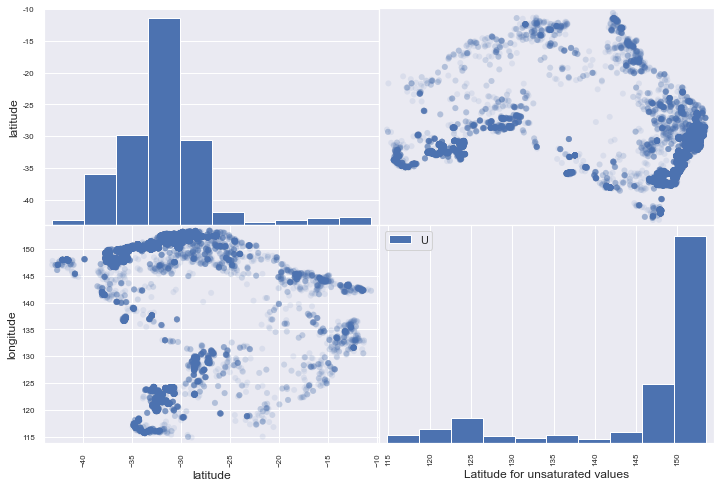

In [39]:
attributes = ["latitude", "longitude"]
scatter_matrix(unsaturated[attributes], figsize=(12, 8), label = "Fire Temperature", alpha = 0.1, marker ='o')
plt.xlabel('Latitude for unsaturated values')
plt.ylabel('Longitude for unsaturated values')
plt.legend("UnsaturatedValues")

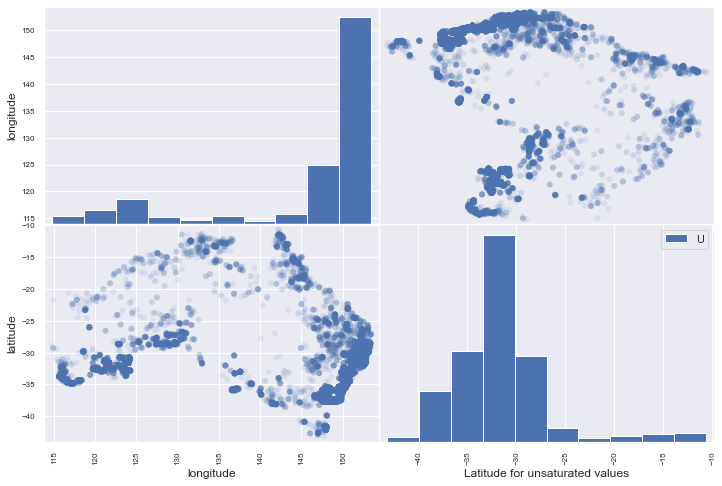

In [40]:
attributes = ["longitude", "latitude"]
scatter_matrix(unsaturated[attributes], figsize=(12, 8), label = "Fire Temperature", alpha = 0.1, marker ='o')
plt.xlabel('Latitude for unsaturated values')
plt.ylabel('Longitude for unsaturated values')
plt.legend("UnsaturatedValues")

# What I believe is by changing the order plot other way round, it doesnt matter with the result. In the end it is the values that are plotted and that will happen according to the axes, which turns the image/plot other way round in diffrent axes

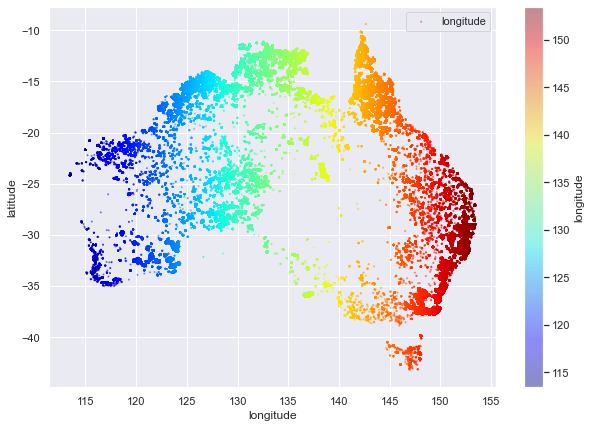

In [41]:
saturated.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=saturated["longitude"]/100, label="longitude", figsize=(10,7),
    c="longitude", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

# One better way of working with georgraphical data is using Geo Pandas Package. 
https://pypi.org/project/geopandas/ 

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

# Question 3

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings

In [43]:
data=pd.read_csv(r'C:\Users\SANJU\Downloads\archive\data.csv')

In [44]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA



# Part 1

Removing the records having Price=0

In [45]:
data.drop(data[data.price==0.0].index,inplace=True)
#getitng the variables that are categorical as true and countinuous as false
column_type = data.dtypes == object
column_type


date              True
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street            True
city              True
statezip          True
country           True
dtype: bool

The countinous features in data are:
Price,Bedrooms,Bathroons,Sqft_living,Sqft_lot,Floors,View,Condtion,Sqft_above,Sqft_basement,yr_built,yr_reovated

The categorical Features are:
StreetCity,StateZip,Country,Waterfront(only 0 and 1)


# Part 2

In [54]:
#Equating elements/columns in dataset to variable for plotting and further use
prices=data['price']
bedrooms=data['bedrooms']
bathrooms=data['bathrooms']
sqft_living=data['sqft_living']
sqft_lot=data['sqft_lot']
floors=data['floors']
views=data['view']
conditions=data['condition']
sqft_above=data['sqft_above']
sqft_below=data['sqft_basement']
yr_built=data['yr_built']
yr_reno=data['yr_renovated']
yr_renovated=yr_reno

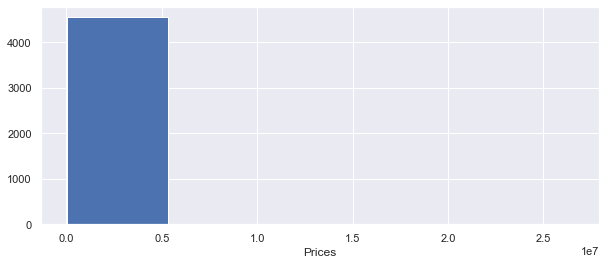

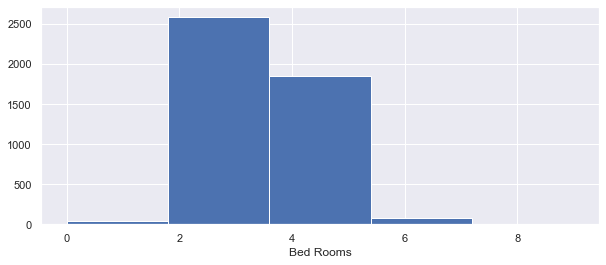

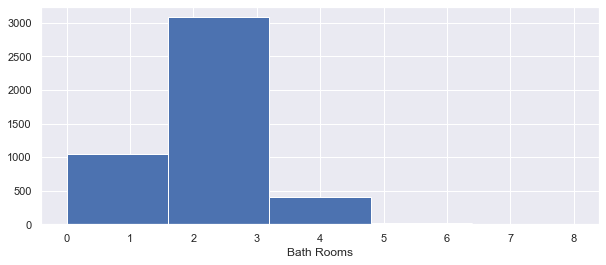

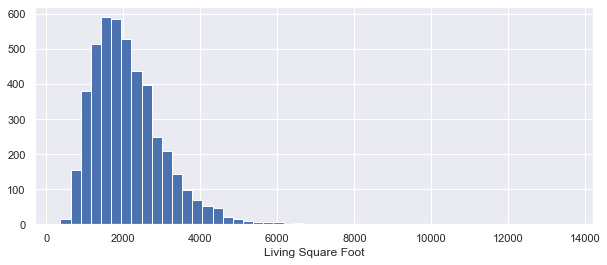

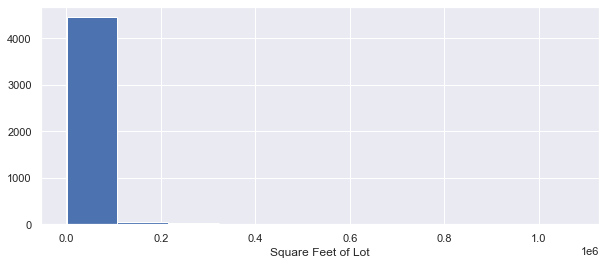

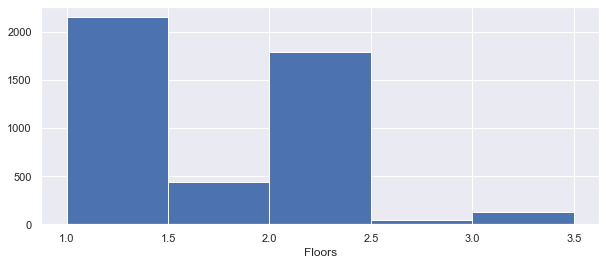

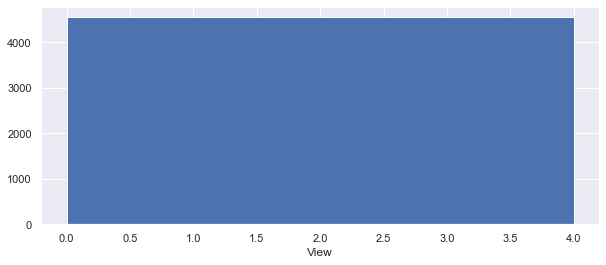

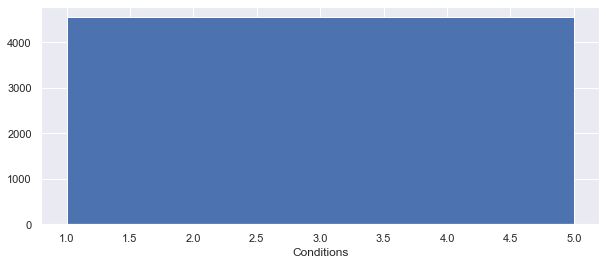

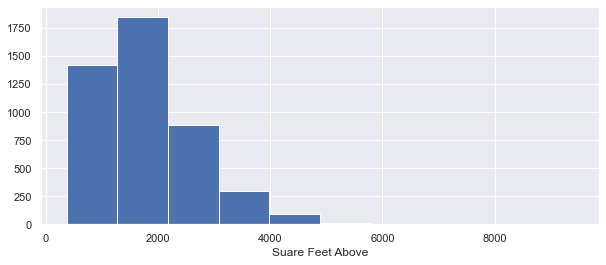

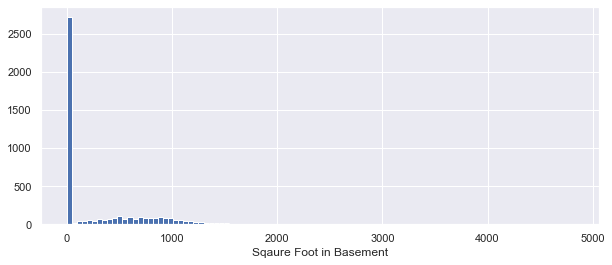

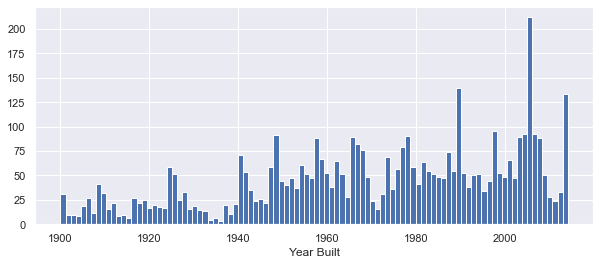

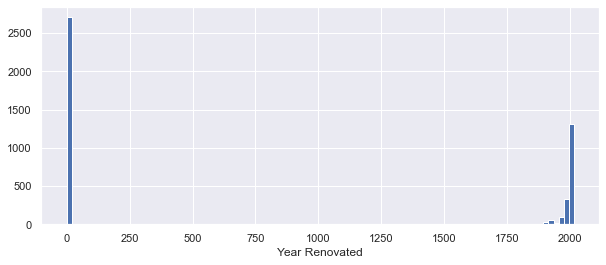

In [55]:
#Plotting The graphs of univariate distribution and distribution of the target
#Plotting them as histograms with size of 10x4
plt.figure(figsize=(10, 4))
plt.hist(prices, bins=5)
plt.xlabel('Prices')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(bedrooms, bins=5)
plt.xlabel('Bed Rooms')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(bathrooms, bins=5)
plt.xlabel('Bath Rooms')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(sqft_living, bins=50)
plt.xlabel('Living Square Foot')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(sqft_lot, bins=10)
plt.xlabel('Square Feet of Lot')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(floors, bins=5)
plt.xlabel('Floors')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(views, bins=1)
plt.xlabel('View')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(conditions, bins=1)
plt.xlabel('Conditions')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(sqft_above, bins=10)
plt.xlabel('Suare Feet Above')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(sqft_below, bins=100)
plt.xlabel('Sqaure Foot in Basement')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(yr_built, bins=100)
plt.xlabel('Year Built')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(yr_reno, bins=100)
plt.xlabel('Year Renovated')
plt.show()



# Part 3

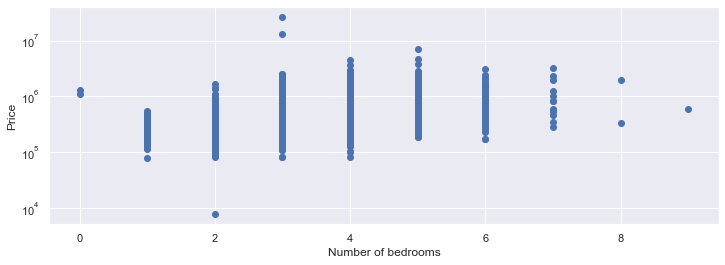

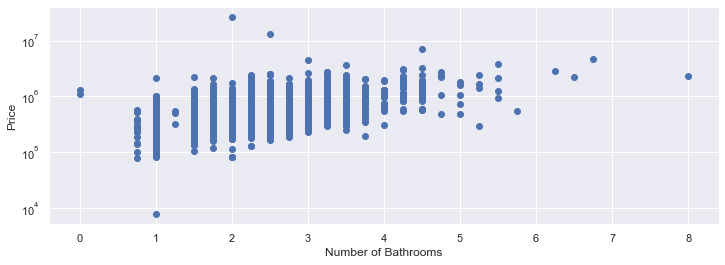

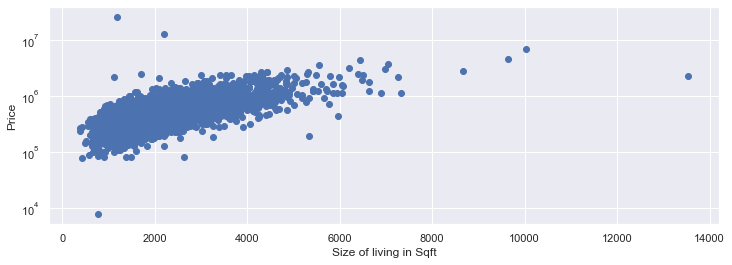

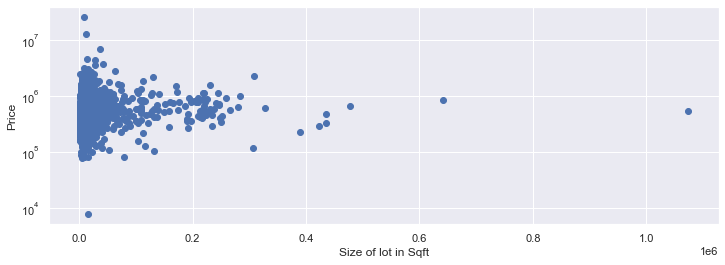

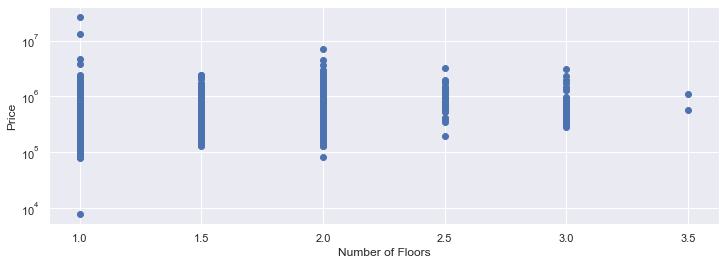

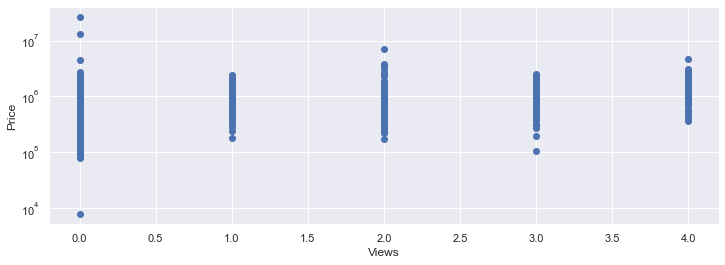

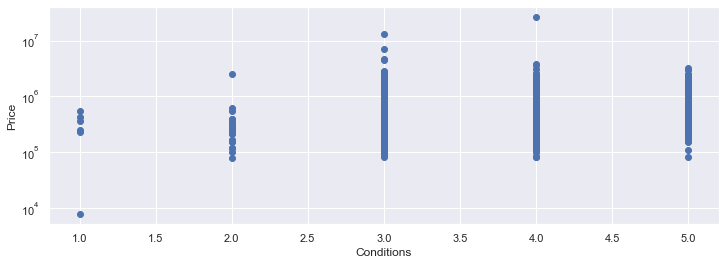

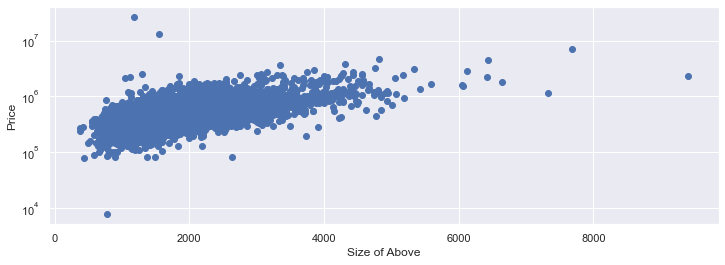

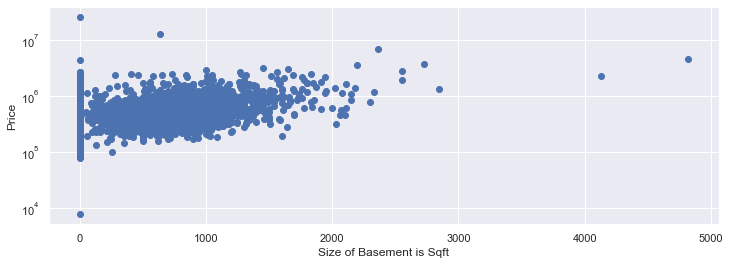

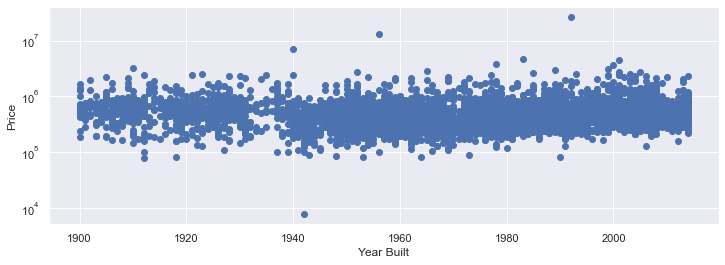

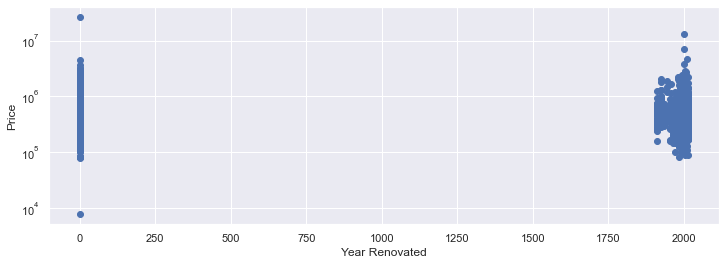

In [56]:
# Plotting all the countinuous x variables vs price as Scatter Plots
plt.figure(figsize=(12, 4))
plt.scatter(bedrooms, prices)
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(bathrooms, prices)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(sqft_living, prices)
plt.xlabel('Size of living in Sqft')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(sqft_lot, prices)
plt.xlabel('Size of lot in Sqft')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(floors, prices)
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(views, prices)
plt.xlabel('Views')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(conditions, prices)
plt.xlabel('Conditions')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(sqft_above, prices)
plt.xlabel('Size of Above')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(sqft_below, prices)
plt.xlabel('Size of Basement is Sqft')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(yr_built, prices)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.yscale('log')
plt.show()
plt.figure(figsize=(12, 4))
plt.scatter(yr_renovated, prices)
plt.xlabel('Year Renovated')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

# Part 4

In [57]:
#converting all the values in year renovated that are equal to zero tp np.nan so that they can be processed using Simple Imputer
#while adding the missinf values
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


In [58]:
#comverting waterfront data to string type for integers of 1s and 0s for yes or no so that they can be used in OneHotEncoder using
#asstype str
data[['waterfront']] = data[['waterfront']].astype('str')
#data.head(5)
features=['bedrooms','bathrooms','sqft_living','sqft_lot','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','city','statezip','waterfront','country']
#print(features)

In [59]:
### creating data frame and splitting them into test and train data frames
from sklearn.model_selection import train_test_split
price_df=data.iloc[:,1]
feat_df=data[features]
#print(price_df)
#print(price_df.shape)
#print(feat_df.shape)
x_train,x_test,y_train,y_test=train_test_split(feat_df,price_df)


In [61]:
#creating column_type so that it has true for categorical variables and false for countinuous variable so that it can be used
#in OnceHotEncoder for categorical values ('column_type') and in SimpelImputer for the missing values in Countinuous variables
#('~column_type')
column_type = feat_df.dtypes == object
column_type


bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
city              True
statezip          True
waterfront        True
country           True
dtype: bool

In [62]:
#checking the number of elemenets that has zeroes/null values and counting them 
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2706
street              0
city                0
statezip            0
country             0
dtype: int64

Linear Regression

0.3890148768320583


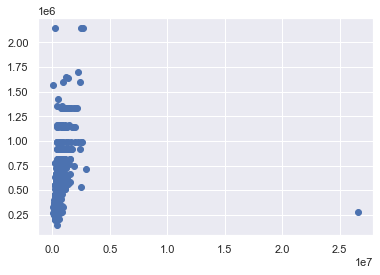

In [63]:
#Loading the required libraries
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer


#Model Build without Scaling

#Doing Preprocessing( through column transformation) without Scalar
# In onehotencoder, I used handle_unknown='ignore' so that when unkown data is encounterd, the OneHotEncoder can ignore it
#and I am passing column_type which gives only the columns where the variables are categorica
column_trans= make_column_transformer(
     (OneHotEncoder(handle_unknown='ignore'),column_type))

#Using Make pipeline to do linear regression, preprocessing and Simple Imputer to replace nan objects in year_renonvated using
#most frequent appearance startegy in that column
lin_reg1=LinearRegression()
lin_reg = make_pipeline(SimpleImputer(strategy='most_frequent'), column_trans, lin_reg1)
lin_reg.fit(x_train,y_train)

#Cross Validation

print(cross_val_score(lin_reg, x_train, y_train, cv=5).mean())

#Predicting and Plotting Using the Model 
prediction=lin_reg.predict(x_test)
#print(prediction)
plt.scatter(y_test,prediction)

0.6558457142951457


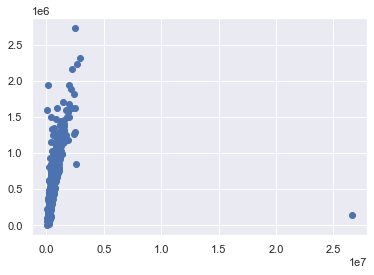

In [64]:
#Model Build with Scaling

#Doing Preprocessing( through column transformation) with Scalar
# We do standard scaling only to countinuous features hence the ~column_type in Column transformer
# In onehotencoder, I used handle_unknown='ignore' so that when unkown data is encounterd, the OneHotEncoder can ignore it
#and I am passing column_type which gives only the columns where the variables are categorical
column_trans= make_column_transformer(
     (StandardScaler(), ~column_type),
     (OneHotEncoder(handle_unknown='ignore'),column_type))

#Using Make pipeline to do linear regression, preprocessing (column transformer) and Simple Imputer to replace nan objects 
#in year_renonvated using most frequent appearance startegy in that column
lin_reg1=LinearRegression()
lin_reg = make_pipeline(SimpleImputer(strategy='most_frequent'), column_trans, lin_reg1)
lin_reg.fit(x_train,y_train)

#Cross Validation

print(cross_val_score(lin_reg, x_train, y_train, cv=5).mean())

#Predicting and Plotting Using the Model 
prediction=lin_reg.predict(x_test)
#print(prediction)
plt.scatter(y_test,prediction)

Ridge Regression

0.392104701801511


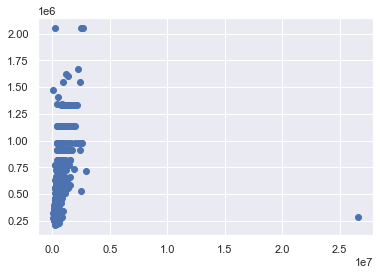

In [65]:
#Model Build without Scaling

#Doing Preprocessing( through column transformation) without Scalar
# In onehotencoder, I used handle_unknown='ignore' so that when unkown data is encounterd, the OneHotEncoder can ignore it
#and I am passing column_type which gives only the columns where the variables are categorical

column_trans= make_column_transformer(
     (OneHotEncoder(handle_unknown='ignore'),column_type))

#Using Make pipeline to do Ridge regression, preprocessing and Simple Imputer to replace nan objects in year_renonvated using
#most frequent appearance startegy in that column
ridge_reg1=Ridge()
ridge_reg = make_pipeline(SimpleImputer(strategy='most_frequent'), column_trans, ridge_reg1)
ridge_reg.fit(x_train,y_train)

#Cross Validation

print(cross_val_score(ridge_reg, x_train, y_train, cv=5).mean())

#Predicting and Plotting Using the Model 
prediction=ridge_reg.predict(x_test)
#print(prediction)
plt.scatter(y_test,prediction)

0.656927889080084


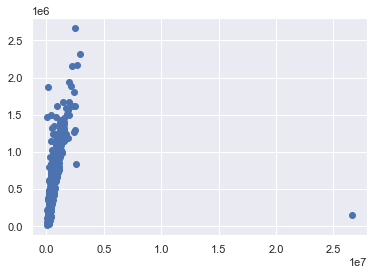

In [66]:
#Model Build with Scaling

#Doing Preprocessing( through column transformation) with Scalar
#usingcolumn trandsform to perform one hot encoding of Categorical Features while ignoring the unknown values and Standard
# We do standard scaling only to countinuous features hence the ~column_type in Column transformer
# In onehotencoder, I used handle_unknown='ignore' so that when unkown data is encounterd, the OneHotEncoder can ignore it
#and I am passing column_type which gives only the columns where the variables are categorical

column_trans= make_column_transformer(
     (StandardScaler(), ~column_type),
     (OneHotEncoder(handle_unknown='ignore'),column_type))

#Using Make pipeline to do Ridge regression, preprocessing and Simple Imputer to replace nan objects in year_renonvated using
#most frequent appearance startegy in that column
ridge_reg1=Ridge()
ridge_reg = make_pipeline(SimpleImputer(strategy='most_frequent'), column_trans, ridge_reg1)
ridge_reg.fit(x_train,y_train)

#Cross Validation

print(cross_val_score(ridge_reg, x_train, y_train, cv=5).mean())

#Predicting and Plotting Using the Model 
prediction=ridge_reg.predict(x_test)
#print(prediction)
plt.scatter(y_test,prediction)

Lasso

0.37764752901024945


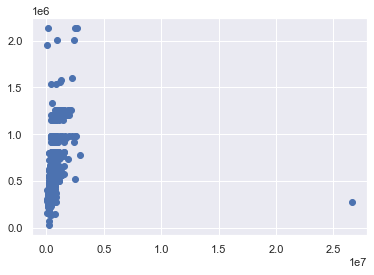

In [67]:
#Model Build without Scaling

#Doing Preprocessing( through column transformation) without Scalar
# In onehotencoder, I used handle_unknown='ignore' so that when unkown data is encounterd, the OneHotEncoder can ignore it
#and I am passing column_type which gives only the columns where the variables are categorical
column_trans= make_column_transformer(
     (OneHotEncoder(handle_unknown='ignore'),column_type))

#Using Make pipeline to do Lasso regression, preprocessing and Simple Imputer to replace nan objects in year_renonvated using
#most frequent appearance startegy in that column
lasso_reg1=Lasso(max_iter=1000, tol=10000.008)
lasso_reg = make_pipeline(SimpleImputer(strategy='most_frequent'), column_trans, lasso_reg1)
lasso_reg.fit(x_train,y_train)

#Cross Validation

print(cross_val_score(lasso_reg, x_train, y_train, cv=5).mean())

#Predicting and Plotting Using the Model 
prediction=lasso_reg.predict(x_test)
#print(prediction)
plt.scatter(y_test,prediction)

0.48028198695313334


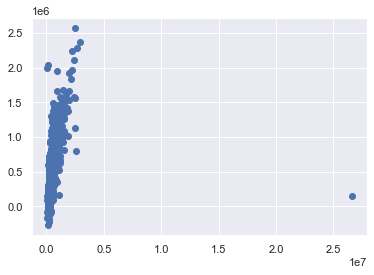

In [68]:
#Model Build with Scaling

#Doing Preprocessing( through column transformation) with Scalar
#usingcolumn trandsform to perform one hot encoding of Categorical Features while ignoring the unknown values and Standard
# In onehotencoder, I used handle_unknown='ignore' so that when unkown data is encounterd, the OneHotEncoder can ignore it
#and I am passing column_type which gives only the columns where the variables are categorical
column_trans= make_column_transformer(
     (StandardScaler(), ~column_type),
     (OneHotEncoder(handle_unknown='ignore'),column_type))

#Using Make pipeline to do Lasso regression, preprocessing and Simple Imputer to replace nan objects in year_renonvated using
#most frequent appearance startegy in that column
lasso_reg1=Lasso(max_iter=5000, tol=10000.008)
lasso_reg = make_pipeline(SimpleImputer(strategy='most_frequent'), column_trans, lasso_reg1)
lasso_reg.fit(x_train,y_train)

#Cross Validation

print(cross_val_score(lasso_reg, x_train, y_train, cv=5).mean())

#Predicting and Plotting Using the Model 
prediction=lasso_reg.predict(x_test)
#print(prediction)
plt.scatter(y_test,prediction)

 ElasticNet Regression 

0.04585751149893715


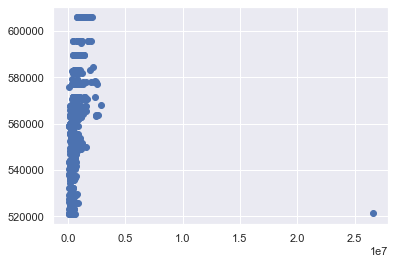

In [69]:
#Model Build without Scaling

#Doing Preprocessing( through column transformation) without Scalar
#usingcolumn trandsform to perform one hot encoding of Categorical Features while ignoring the unknown values 

column_trans= make_column_transformer(
     (OneHotEncoder(handle_unknown='ignore'),column_type))

#Using Make pipeline to do ElasticNet Regression regression, preprocessing and Simple Imputer to replace nan objects in year_renonvated using
#most frequent appearance startegy in that column
elastic_reg1=ElasticNet()
elastic_reg = make_pipeline(SimpleImputer(strategy='most_frequent'), column_trans, elastic_reg1)
elastic_reg.fit(x_train,y_train)

#Cross Validation

print(cross_val_score(elastic_reg, x_train, y_train, cv=5).mean())

#Predicting and Plotting Using the Model 
prediction=elastic_reg.predict(x_test)
#print(prediction)
plt.scatter(y_test,prediction)

0.48875876380896893


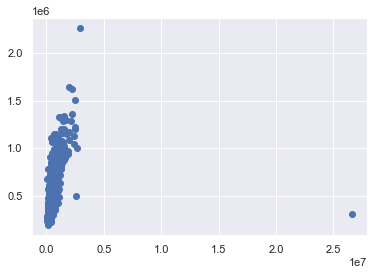

In [70]:
#Model Build with Scaling

#Doing Preprocessing( through column transformation) with Scalar
#usingcolumn trandsform to perform one hot encoding of Categorical Features while ignoring the unknown values and Standard
# We do standard scaling only to countinuous features hence the ~column_type in Column transformer

column_trans= make_column_transformer(
     (StandardScaler(), ~column_type),
     (OneHotEncoder(handle_unknown='ignore'),column_type))

#Using Make pipeline to do linear regression, preprocessing and Simple Imputer to replace nan objects in year_renonvated using
#most frequent appearance startegy in that column
elastic_reg1=ElasticNet()
elastic_reg = make_pipeline(SimpleImputer(strategy='most_frequent'), column_trans, elastic_reg1)
elastic_reg.fit(x_train,y_train)

#Cross Validation

print(cross_val_score(elastic_reg, x_train, y_train, cv=5).mean())

#Predicting and Plotting Using the Model 
prediction=elastic_reg.predict(x_test)
#print(prediction)
plt.scatter(y_test,prediction)            

Yes scaling the dataset with StandardScaler helps the model to increase the efficieny of the prediction. As we can observe from results that in all the regression models, the Cross validation value of the scaled dataset is more than the unscaled one and that model is more efficient. So henceforth, we can train the data set after scaling the same.

# QUESTION 4

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Reading dataset of .arff format
from scipy.io.arff import loadarff
raw_data = loadarff('dataset_31_credit-g.arff')
df_data = pd.DataFrame(raw_data[0])

In [3]:
df_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [4]:
#to understand the correlation
df_data.corr()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


#### Part 1

In [5]:
df_data.info()
#The features of continuous variables are of 'float64' data type. 
#The features of categorical variables are of 'object' data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null float64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null float64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null float64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null float64
property_magnitude        1000 non-null object
age                       1000 non-null float64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null float64
job                       1000 non-null object
num_dependents            1000 non-null float64
own_telephone             1000 non-null o

In [6]:
df_data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
#trying to learn a bit more about the categorical data
df_data.describe(include=object)

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,b'no checking',b'existing paid',b'radio/tv',b'<100',b'1<=X<4',b'male single',b'none',b'car',b'none',b'own',b'skilled',b'none',b'yes',b'good'
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


#### Part 2

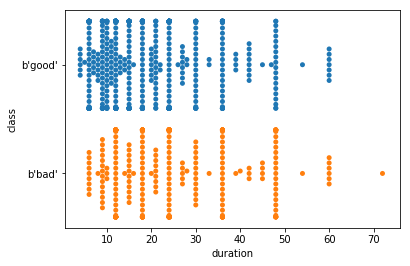

In [8]:
sns.swarmplot(x=df_data['duration'],y=df_data['class'])

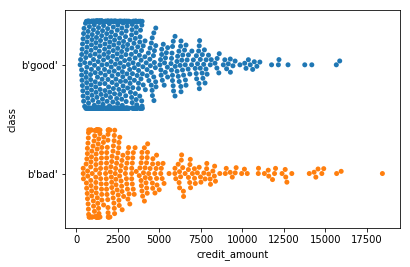

In [9]:
sns.swarmplot(x=df_data['credit_amount'],y=df_data['class'])

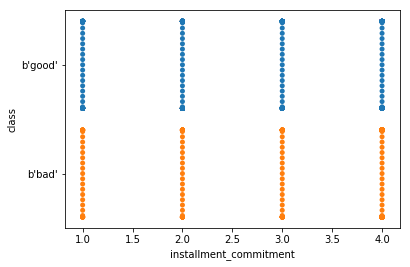

In [10]:
sns.swarmplot(x=df_data['installment_commitment'],y=df_data['class'])

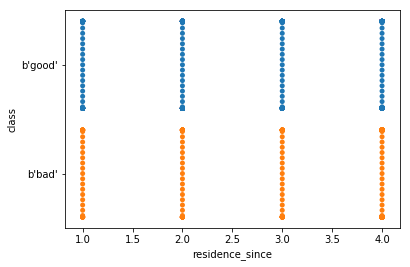

In [11]:
sns.swarmplot(x=df_data['residence_since'],y=df_data['class'])

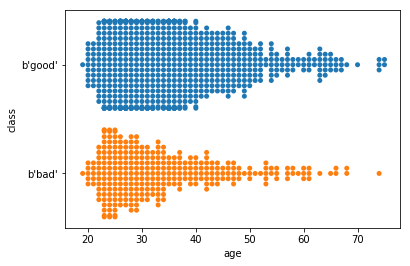

In [12]:
sns.swarmplot(x=df_data['age'],y=df_data['class'])

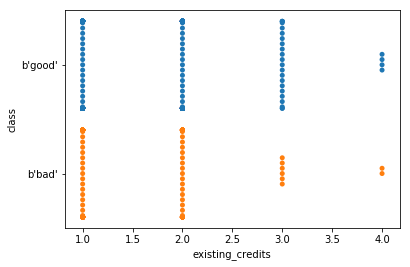

In [13]:
sns.swarmplot(x=df_data['existing_credits'],y=df_data['class'])

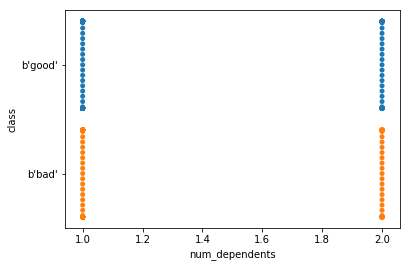

In [14]:
sns.swarmplot(x=df_data['num_dependents'],y=df_data['class'])

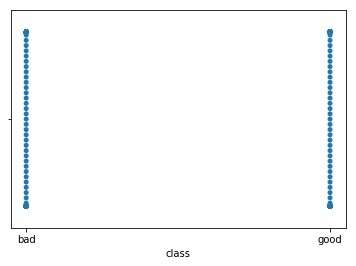

In [15]:
sns.swarmplot(x=df_data['class'])

In [16]:
df_data.isnull().sum()
# as we can see, we dont have to deal with missing values as there are no null values

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [17]:
df_data.notnull().sum()

checking_status           1000
duration                  1000
credit_history            1000
purpose                   1000
credit_amount             1000
savings_status            1000
employment                1000
installment_commitment    1000
personal_status           1000
other_parties             1000
residence_since           1000
property_magnitude        1000
age                       1000
other_payment_plans       1000
housing                   1000
existing_credits          1000
job                       1000
num_dependents            1000
own_telephone             1000
foreign_worker            1000
class                     1000
dtype: int64

#### PART 3 and PART 4

Training Models ( Logistic Regression , Linear Support Vector Machine , K Nearest Neighbor with and without Scaling )

As mentioned for processing data, I have used ColumnTransformer for dealing with categorical data columns on the dataset, for target variable i have used a LabelEncoder.

For evaluation of the model I have calculated:

#The Accuracy (on testing set of target variable and predicted set of target variables)

#Precision (The ratio of True Positive and the sum of True Positive and False Positive, Precision indicates how well a method or instrument gives the same result when a single sample is tested repeatedly)

#Recall (The ratio of True Positive and the sum of True Positive and False Negative, Recall is the measure that tells you the percentage of positives you label correctly)

#F1 Score (F1 score gives the combined result of Precision and Recall. It is a Harmonic Mean of Precision and Recall)

#Classifier.score(on testing set of data)

In [18]:
X = df_data.iloc[:, :-1].values
y = df_data.iloc[:, -1].values

In [19]:
#Encoder for Categorical columns of the dataset
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,2,3,5,6,8,9,11,13,14,16,18,19])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
print(X)

[[0.0 1.0 0.0 ... 67.0 2.0 1.0]
 [1.0 0.0 0.0 ... 22.0 1.0 1.0]
 [0.0 0.0 0.0 ... 49.0 1.0 2.0]
 ...
 [0.0 0.0 0.0 ... 38.0 1.0 1.0]
 [0.0 1.0 0.0 ... 23.0 1.0 1.0]
 [1.0 0.0 0.0 ... 27.0 1.0 1.0]]


In [21]:
#For target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
#Spliting the datset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 1)

In [23]:
print(X_train)

[[0.0 0.0 0.0 ... 26.0 1.0 1.0]
 [1.0 0.0 0.0 ... 44.0 1.0 1.0]
 [0.0 1.0 0.0 ... 23.0 1.0 1.0]
 ...
 [0.0 0.0 0.0 ... 46.0 2.0 1.0]
 [0.0 1.0 0.0 ... 30.0 1.0 2.0]
 [0.0 0.0 1.0 ... 37.0 1.0 1.0]]


In [24]:
print(y_train)

[1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1
 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 1 

In [25]:
print(y_test)

[0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1
 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0]


In [26]:
print(X_test)

[[1.0 0.0 0.0 ... 34.0 1.0 2.0]
 [0.0 1.0 0.0 ... 43.0 1.0 1.0]
 [0.0 0.0 0.0 ... 34.0 2.0 1.0]
 ...
 [0.0 0.0 0.0 ... 29.0 2.0 1.0]
 [0.0 0.0 0.0 ... 32.0 2.0 2.0]
 [0.0 0.0 0.0 ... 39.0 2.0 2.0]]


In [27]:
#LOGISTIC REGRESSION without Scaling
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 37  40]
 [ 22 171]]


0.7703703703703704

In [30]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)

0.8104265402843602

In [31]:
recall_score(y_test, y_pred)

0.8860103626943006

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8465346534653466

In [33]:
classifier.score(X_test, y_test)

0.7703703703703704

In [34]:
from scipy.io.arff import loadarff
raw_data = loadarff('dataset_31_credit-g.arff')
df_data = pd.DataFrame(raw_data[0])
X1 = df_data.iloc[:, :-1].values
y1 = df_data.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,2,3,5,6,8,9,11,13,14,16,18,19])], remainder='passthrough')
X1 = np.array(ct.fit_transform(X1))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y1)

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.27, random_state = 1)



In [35]:
#Linear SVM without scaling
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
y1_pred = classifier.predict(X1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),1))

[[1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)
accuracy_score(y1_test, y1_pred)

[[ 32  45]
 [ 20 173]]


0.7592592592592593

In [38]:
from sklearn.metrics import precision_score, recall_score
precision_score(y1_test, y1_pred)

0.7935779816513762

In [39]:
recall_score(y1_test, y1_pred)

0.8963730569948186

In [40]:
from sklearn.metrics import f1_score
f1_score(y1_test, y1_pred)

0.8418491484184915

In [41]:
classifier.score(X1_test, y1_test)

0.7592592592592593

In [42]:
#Nearest Neighbor without scaling
from scipy.io.arff import loadarff
raw_data = loadarff('dataset_31_credit-g.arff')
df_data = pd.DataFrame(raw_data[0])
X2 = df_data.iloc[:, :-1].values
y2 = df_data.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,2,3,5,6,8,9,11,13,14,16,18,19])], remainder='passthrough')
X2 = np.array(ct.fit_transform(X2))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2 = le.fit_transform(y2)

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.27, random_state = 0)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
y2_pred = classifier.predict(X2_test)
print(np.concatenate((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y2_test, y2_pred)
print(cm2)
accuracy_score(y2_test, y2_pred)

[[ 18  59]
 [ 37 156]]


0.6444444444444445

In [46]:
from sklearn.metrics import precision_score, recall_score
precision_score(y2_test, y2_pred)

0.7255813953488373

In [47]:
recall_score(y2_test, y2_pred)

0.8082901554404145

In [48]:
from sklearn.metrics import f1_score
f1_score(y2_test, y2_pred)

0.7647058823529411

In [49]:
classifier.score(X2_test, y2_test)

0.6444444444444445

In [50]:
from scipy.io.arff import loadarff
raw_data = loadarff('dataset_31_credit-g.arff')
df_data = pd.DataFrame(raw_data[0])
X3 = df_data.iloc[:, :-1].values
y3 = df_data.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,2,3,5,6,8,9,11,13,14,16,18,19])], remainder='passthrough')
X3 = np.array(ct.fit_transform(X3))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y3 = le.fit_transform(y3)

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.27, random_state = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

In [51]:
#Logistic Regression with Scaling
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X3_train, y3_train)

C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y3_pred = classifier.predict(X3_test)
print(np.concatenate((y3_pred.reshape(len(y3_pred),1), y3_test.reshape(len(y3_test),1)),1))

[[1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y3_test, y3_pred)
print(cm3)
accuracy_score(y3_test, y3_pred)

[[ 37  40]
 [ 24 169]]


0.762962962962963

In [54]:
from sklearn.metrics import precision_score, recall_score
precision_score(y3_test, y3_pred)

0.8086124401913876

In [55]:
recall_score(y3_test, y3_pred)

0.8756476683937824

In [56]:
from sklearn.metrics import f1_score
f1_score(y3_test, y3_pred)

0.8407960199004977

In [57]:
classifier.score(X3_test, y3_test)

0.762962962962963

In [58]:
from scipy.io.arff import loadarff
raw_data = loadarff('dataset_31_credit-g.arff')
df_data = pd.DataFrame(raw_data[0])
X4 = df_data.iloc[:, :-1].values
y4 = df_data.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,2,3,5,6,8,9,11,13,14,16,18,19])], remainder='passthrough')
X4 = np.array(ct.fit_transform(X4))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y4 = le.fit_transform(y4)

from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.27, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X4_train = sc.fit_transform(X4_train)
X4_test = sc.transform(X4_test)

In [59]:
#LSVM with Scaling
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X4_train, y4_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
y4_pred = classifier.predict(X4_test)
print(np.concatenate((y4_pred.reshape(len(y4_pred),1), y4_test.reshape(len(y4_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y4_test, y4_pred)
print(cm4)
accuracy_score(y4_test, y4_pred)

[[ 39  38]
 [ 34 159]]


0.7333333333333333

In [62]:
from sklearn.metrics import precision_score, recall_score
precision_score(y4_test, y4_pred)

0.8071065989847716

In [63]:
recall_score(y4_test, y4_pred)

0.8238341968911918

In [64]:
from sklearn.metrics import f1_score
f1_score(y4_test, y4_pred)

0.8153846153846155

In [65]:
classifier.score(X4_test, y4_test)

0.7333333333333333

In [66]:
from scipy.io.arff import loadarff
raw_data = loadarff('dataset_31_credit-g.arff')
df_data = pd.DataFrame(raw_data[0])
X5 = df_data.iloc[:, :-1].values
y5 = df_data.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,2,3,5,6,8,9,11,13,14,16,18,19])], remainder='passthrough')
X5 = np.array(ct.fit_transform(X5))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y5 = le.fit_transform(y5)

from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.27, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X5_train = sc.fit_transform(X5_train)
X5_test = sc.transform(X5_test)




In [67]:
#Nearest Neighbor with Scaling
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X5_train, y5_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
y5_pred = classifier.predict(X5_test)
print(np.concatenate((y5_pred.reshape(len(y5_pred),1), y5_test.reshape(len(y5_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm5 = confusion_matrix(y5_test, y5_pred)
print(cm5)
accuracy_score(y5_test, y5_pred)

[[ 32  45]
 [ 34 159]]


0.7074074074074074

In [70]:
from sklearn.metrics import precision_score, recall_score
precision_score(y5_test, y5_pred)

0.7794117647058824

In [71]:
recall_score(y5_test, y5_pred)

0.8238341968911918

In [72]:
from sklearn.metrics import f1_score
f1_score(y5_test, y5_pred)

0.801007556675063

In [73]:
classifier.score(X5_test, y5_test)

0.7074074074074074

To see how different are the results:

##Logistic Regression:

Accuracy (target variable testing set and predicted set) - without Scaling 0.7703 , with scaling 0.7629

Precision - without Scaling 0.8104 , with scaling 0.8086

Recall - without Scaling 0.8860 , with scaling 0.8756

F1- without Scaling 0.8465 , with scaling 0.8407

Classifier score (testing set of data)- without Scaling 0.7703 , with scaling 0.7629

We can see a very slight decrease in performance after scaling.

##LSVM

Accuracy (target variable testing set and predicted set) - without Scaling 0.7592 , with scaling 0.7333

Precision - without Scaling 0.7935 , with scaling 0.8071

Recall - without Scaling 0.8963 , with scaling 0.8238

F1- without Scaling 0.8418 , with scaling 0.8153

Classifier score (testing set of data)- without Scaling 0.7592 , with scaling 0.7333

We can see a slight decrease in metrics except a little improvement in precision telling how well a method or instrument gives the same result when a single sample is tested repeatedly. Also an important point to mention, after scaling the model training speed reduced a lot as compared to the time before scaling.

##KNN

Accuracy (target variable testing set and predicted set) - without Scaling 0.6444 , with scaling 0.7074

Precision - without Scaling 0.7255 , with scaling 0.7794

Recall - without Scaling 0.8082 , with scaling 0.8238

F1-without Scaling 0.7647 , with scaling 0.8010

Classifier score (testing set of data)- without Scaling 0.6444 , with scaling 0.7074

We can see a very impressive improvement after scaling in all the metrics.